<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  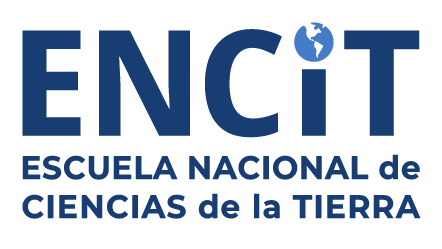
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 2: Manejo de datos</span><br/>
  <span style="color:DodgerBlue; font-size:140%;">Notebook 1: Datos txt y csv </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen">  Manejo de datos en formato csv </font>**

El formato _CSV_ (Comma-Separated Values) es una de las formas más comunes de almacenar y compartir datos en el análisis de datos. En un archivo _CSV_, los datos se organizan en forma de tabla, donde cada fila representa una observación o registro y cada columna representa una variable o característica. Los valores en el archivo _CSV_ están separados por comas (o a veces por otro delimitador, como un punto y coma o una tabulación). 

El estar formateados por comas hace que los archivos _CSV_ sean fáciles de leer y escribir tanto para humanos como para computadoras. Una de las principales ventajas del formato _CSV_ es su simplicidad y su compatibilidad con una amplia gama de herramientas de análisis de datos, como hojas de cálculo, bases de datos y lenguajes de programación como Python.

## **<font color="SeaGreen">  El ozono en la región más transparente </font>**

### **<font color="YellowGreen">  Dirección de Monitoreo de la Calidad del Aire </font>** 

En este notebook analizaremos una base de datos en formato csv proveniente de la Secretaría del Medio Ambiente de la CDMX. La información, que nos dan estos datos, seguramente ha llegado a modificar la vida diaria de todos nosotros. 
Específicamente, tenemos en este notebook datos del contaminante ozono ($O_3$). Por si no sabe por qué el ozono es un agente nocivo para la salud o qué tipo de contaminación genera, ver: 

- https://planeteando.org/2020/03/31/el-ozono-en-la-region-mas-transparente-durante-la-cuarentena/

- https://www.comoves.unam.mx/numeros/aquiestamos/210

**Características de los datos**

Período: los datos van de enero 2022 a diciembre 2023. 

Frecuencia: horaria, mediciones de concentración promedio cada hora. 

Estaciones: datos reportados por estación, para todas las estaciones que miden ozono. 

Unidades: ppb. 

Para saber más de la Red de Monitoreo, los datos, o la calidad del aire, ver:


http://www.aire.cdmx.gob.mx/aire/default.php


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

def grafico_linea_ts(xmin,xmax,xlab,ylab,title,ymin=None,ymax=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # poner las labels de los ejes y el titulo
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    # checar si queremos leyenda, si sí, la ponemos y fancy
    if legend:
        plt.legend(fontsize=12.5,fancybox=True,shadow=True)

La lectura y escritura de archivos CSV con Pandas es fundamental para importar datos desde diferentes fuentes, como hojas de cálculo, bases de datos y sistemas de almacenamiento en la nube, así como para exportar datos procesados a diferentes formatos. En esta introducción, exploraremos cómo usar Pandas para leer datos de archivos CSV en un DataFrame de Pandas y cómo escribir un DataFrame de Pandas de vuelta a un archivo CSV.

Para empezar, importaremos la biblioteca Pandas en nuestro entorno de trabajo. Luego, utilizaremos la función `pd.read_csv()` para leer un archivo CSV y cargar los datos en un DataFrame de Pandas. 
Por otro lado, exploraremos cómo usar el método `to_csv()` para escribir un DataFrame de Pandas en un archivo CSV. 

La sintaxis de `pd.read_csv()` es sencilla, siempre y cuando nuestros datos de csv estén bien formateados de origen. 

Spoiler, la Red de Monitoreo no los tiene tan bonitos como aquí. 

Para usar `pd.read_csv()` solo le damos como argumento un `str` que sea la dirección **correcta** de nuestro archivo. 


In [54]:
# carga de archivo csv
df=pd.read_csv('datos_limpios_O3.csv')
df

,Unnamed: 0,Date,value,id_station
0,1,2022-01-01 00:00:00,16.0,AJU
1,2,2022-01-01 00:00:00,2.0,ATI
2,3,2022-01-01 00:00:00,1.0,CAM
3,5,2022-01-01 00:00:00,19.0,CHO
4,7,2022-01-01 00:00:00,40.0,CUA
...,...,...,...,...
277599,525341,2023-01-01 00:00:00,31.0,AJM
277600,525343,2023-01-01 00:00:00,2.0,BJU
277601,525344,2023-01-01 00:00:00,19.0,INN
277602,525345,2023-01-01 00:00:00,2.0,GAM


Estos datos tienen 3 columnas:

- Date: La fecha en formato de año, mes, día, hora, minuto y segundo. 
- value: valor de concentración medido
- id_station: nombre o identificador de la estación. 

### **<font color="SeaGreen"> Pequeñas transformaciones de datos </font>**

A menos que ya hayan procesado mucho sus datos, seguramente los datos "crudos" no serán directamente útiles para su análisis y querrán cambiar algunas cosas que no les gusten. 

Por ejemplo, la Red de Monitoreo le llama a su columna de estación `id_station` pero a mí no me gusta mucho. 

Para cambiarle el nombre a una columna, se utiliza el método rename, el cuál requiere un diccionario que le diga qué cambios se hacen, primero el nombre anterior y luego el nombre nuevo, y en qué eje. 

Las columnas en Pandas son el eje 1, mientras que las filas son el eje 0. 

De manera que si quisiéramos cambiarle el nombre a la columna de estación por "Estacion", se hace de la siguiente forma:

In [55]:
# renombrando los nombres de columnas
df=df.rename({'id_station':'Estacion'},axis=1)
df

,Unnamed: 0,Date,value,Estacion
0,1,2022-01-01 00:00:00,16.0,AJU
1,2,2022-01-01 00:00:00,2.0,ATI
2,3,2022-01-01 00:00:00,1.0,CAM
3,5,2022-01-01 00:00:00,19.0,CHO
4,7,2022-01-01 00:00:00,40.0,CUA
...,...,...,...,...
277599,525341,2023-01-01 00:00:00,31.0,AJM
277600,525343,2023-01-01 00:00:00,2.0,BJU
277601,525344,2023-01-01 00:00:00,19.0,INN
277602,525345,2023-01-01 00:00:00,2.0,GAM


También me gusta más cambiar el "value" por "Concentración". 

Imprimimos de nuevo el dataframe para ver cómo cambiaron los nombres de las columnas.

In [56]:
df=df.rename({'value':'Concentracion'},axis=1)
df

,Unnamed: 0,Date,Concentracion,Estacion
0,1,2022-01-01 00:00:00,16.0,AJU
1,2,2022-01-01 00:00:00,2.0,ATI
2,3,2022-01-01 00:00:00,1.0,CAM
3,5,2022-01-01 00:00:00,19.0,CHO
4,7,2022-01-01 00:00:00,40.0,CUA
...,...,...,...,...
277599,525341,2023-01-01 00:00:00,31.0,AJM
277600,525343,2023-01-01 00:00:00,2.0,BJU
277601,525344,2023-01-01 00:00:00,19.0,INN
277602,525345,2023-01-01 00:00:00,2.0,GAM


### **<font color="SeaGreen"> Declarando la fecha y el índice </font>**

El método `pd.to_datetime` en Pandas se utiliza para convertir objetos de fecha y hora en el formato datetime de Python. Este método es extremadamente útil cuando se trabaja con datos de series temporales, ya que permite manipular y analizar fácilmente fechas y horas en un DataFrame de Pandas.

Cuando se aplica `pd.to_datetime` a una serie o columna de un DataFrame de Pandas que contiene datos de fecha y hora en diferentes formatos (como cadenas de texto, números enteros o objetos de fecha y hora), Pandas intentará convertir estos datos en objetos datetime de Python de manera inteligente y eficiente. Esto significa que el método pd.to_datetime puede manejar una variedad de formatos de entrada, incluidas fechas y horas en formato ISO, formatos de fecha comunes, como 'YYYY-MM-DD', y formatos personalizados.



In [57]:
df['Date']=pd.to_datetime(df.Date)
print(df)
print(df.index)

        Unnamed: 0       Date  Concentracion Estacion
0                1 2022-01-01           16.0      AJU
1                2 2022-01-01            2.0      ATI
2                3 2022-01-01            1.0      CAM
3                5 2022-01-01           19.0      CHO
4                7 2022-01-01           40.0      CUA
...            ...        ...            ...      ...
277599      525341 2023-01-01           31.0      AJM
277600      525343 2023-01-01            2.0      BJU
277601      525344 2023-01-01           19.0      INN
277602      525345 2023-01-01            2.0      GAM
277603      525346 2023-01-01            3.0      FAR

[277604 rows x 4 columns]
RangeIndex(start=0, stop=277604, step=1)


Ahora cambiaremos el índice y lo sustuiremos por la columna de fecha. ¿Por qué? Es útil que el índice en un DataFrame de Pandas esté en formato pd.to_datetime por varias razones:

1. Facilidad de manipulación temporal: Al tener el índice en formato datetime, Pandas proporciona una amplia gama de métodos y funciones para realizar operaciones de indexación y selección basadas en fechas y horas. Esto facilita la realización de análisis temporales, como filtrar datos por rangos de fechas, realizar agregaciones temporales y calcular diferencias temporales.

2. Interpolación y rellenado de datos faltantes: Pandas ofrece funcionalidades de interpolación y rellenado de datos faltantes que pueden ser particularmente útiles en datos de series temporales. Al tener el índice en formato datetime, Pandas puede interpolarse y rellenarse fácilmente valores faltantes basados en fechas y horas.

3. Visualización y gráficos temporales: Tener el índice en formato datetime facilita la creación de visualizaciones y gráficos temporales utilizando herramientas integradas de Pandas y bibliotecas de visualización como Matplotlib y Seaborn. Esto permite explorar y comunicar patrones temporales en los datos de manera efectiva.

In [58]:
# sustituimos el indice
df.index=df.Date
# imprimimos las primeras columnas
print(df.head())
# nos deshacemos de la columna Date pero no del índice
df=df.drop('Date',axis=1)
df

            Unnamed: 0       Date  Concentracion Estacion
Date                                                     
2022-01-01           1 2022-01-01           16.0      AJU
2022-01-01           2 2022-01-01            2.0      ATI
2022-01-01           3 2022-01-01            1.0      CAM
2022-01-01           5 2022-01-01           19.0      CHO
2022-01-01           7 2022-01-01           40.0      CUA


,Unnamed: 0,Concentracion,Estacion
Date,,,
2022-01-01,1,16.0,AJU
2022-01-01,2,2.0,ATI
2022-01-01,3,1.0,CAM
2022-01-01,5,19.0,CHO
2022-01-01,7,40.0,CUA
...,...,...,...
2023-01-01,525341,31.0,AJM
2023-01-01,525343,2.0,BJU
2023-01-01,525344,19.0,INN


Ahora que el índice tiene formato de fecha, accedemos a toda una gama de atributos, funciones y posibilidades de manipular nuestros datos con fechas. 

Entre los atributos más utilizados se encuentra el uso de "month", "day" y "year de la siguiente forma:

In [59]:
print(df.index.month)
print(df.index.year)

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='Date', length=277604)
Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='Date', length=277604)


La lista completa de atributos de un `DataFrame.DatetimeIndex` la pueden encontrar aquí:

https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

Podemos usar estos atributos para hacer un slice sobre el dataframe original. Es decir, vamos a recortar los datos a sólo los datos del 2023.

In [60]:
df2023=df.loc[df.index.year==2023]
df2023

,Unnamed: 0,Concentracion,Estacion
Date,,,
2023-01-01,525312,3.0,ACO
2023-01-01,525313,13.0,AJU
2023-01-01,525314,2.0,ATI
2023-01-01,525315,1.0,CAM
2023-01-01,525317,4.0,CHO
2023-01-01,525319,18.0,CUA
2023-01-01,525320,4.0,CUT
2023-01-01,525321,4.0,FAC
2023-01-01,525323,4.0,IZT


Y ahora solamente a los datos de febrero. 
Noten bien que los meses se cuentan desde el 1 hasta el 12. El 12 es diciembre, naturalmente.

In [61]:
df_feb=df.loc[df.index.month==2]
df_feb

,Unnamed: 0,Concentracion,Estacion
Date,,,
2022-02-01 00:00:00,26785,12.0,AJU
2022-02-01 00:00:00,26789,5.0,CHO
2022-02-01 00:00:00,26791,33.0,CUA
2022-02-01 00:00:00,26792,3.0,CUT
2022-02-01 00:00:00,26797,18.0,LPR
...,...,...,...
2022-02-28 23:00:00,260919,2.0,CCA
2022-02-28 23:00:00,260923,2.0,BJU
2022-02-28 23:00:00,260924,18.0,INN


Otros métodos de Pandas útiles para operar rápidamente nuestra base de datos. 

- `unique()`: Este método se utiliza para obtener los valores únicos en una serie. Es especialmente útil cuando se quiere identificar los distintos valores presentes en una columna de un DataFrame.

- `value_counts()`: Este método cuenta la frecuencia de cada valor único en una serie. Es útil para determinar la distribución de los valores en una columna.

Por ejemplo, si queremos ver cuáles son las estaciones únicas en nuestra base de datos podemos hacer lo siguiente:

In [62]:
estaciones=df['Estacion'].unique()
print(estaciones)

['AJU' 'ATI' 'CAM' 'CHO' 'CUA' 'CUT' 'FAC' 'IZT' 'LLA' 'LPR' 'MER' 'NEZ'
 'PED' 'SAG' 'SFE' 'TAH' 'TLA' 'TLI' 'UIZ' 'VIF' 'CCA' 'MGH' 'MPA' 'BJU'
 'INN' 'GAM' 'FAR' 'SAC' 'ACO' 'MON' 'UAX' 'AJM']


In [63]:
# slice para agarrar concentracion de 0.
print(df[df['Concentracion']==0])
# cuantas veces contamos concentracion de 0 ppb en cada estacion
cuentas=df[df['Concentracion']==0].value_counts()
print(cuentas)

                     Unnamed: 0  Concentracion Estacion
Date                                                   
2022-01-02 00:00:00         892            0.0      MGH
2022-01-02 01:00:00         928            0.0      MGH
2022-01-02 03:00:00         975            0.0      CAM
2022-01-02 04:00:00        1011            0.0      CAM
2022-01-02 04:00:00        1036            0.0      MGH
...                         ...            ...      ...
2022-12-26 03:00:00      520247            0.0      IZT
2022-12-30 03:00:00      523719            0.0      CCA
2022-12-30 05:00:00      523791            0.0      CCA
2022-12-30 06:00:00      523827            0.0      CCA
2022-12-30 07:00:00      523863            0.0      CCA

[1412 rows x 3 columns]
Unnamed: 0  Concentracion  Estacion
892         0.0            MGH         1
281019      0.0            CAM         1
295557      0.0            GAM         1
294889      0.0            LPR         1
294873      0.0            GAM         1
      

**Más slicing**

Como ya hemos aludido en celdas pasadas al concepto de slicing, veremos un poco más de cómo recortar nuesto dataframe. La sintaxis básica de slicing en Pandas es con `df.loc[condition]` que se utiliza para seleccionar un subconjunto de filas de un DataFrame que cumplan con cierta condición. 

Aquí otro ejemplo para seleccionar una estación específica de todas las estaciones de monitoreo y sólo quedarnos con los datos de esa estación. 

Específicamenete, usaremos la estación del CCA que es la que se encuentra a escasos 100 m de la posición del salón en lo que ahora es el _Instituto de Ciencias de la Atmósfera y Cambio Climático_. 

In [64]:
cca=df[df.Estacion=='CCA']
cca

,Unnamed: 0,Concentracion,Estacion
Date,,,
2022-01-01 00:00:00,27,5.0,CCA
2022-01-01 01:00:00,63,10.0,CCA
2022-01-01 02:00:00,99,9.0,CCA
2022-01-01 03:00:00,135,6.0,CCA
2022-01-01 04:00:00,171,4.0,CCA
...,...,...,...
2022-12-31 20:00:00,525195,22.0,CCA
2022-12-31 21:00:00,525231,11.0,CCA
2022-12-31 22:00:00,525267,2.0,CCA


También podemos utilizar una lista de estaciones y quedarnos sólo con los datos de esas estaciones. 

Para esto, se usa el método `isin(lista)` que nos permite evaluar si un objeto, está en una lista. 

Por ejemplo en la siguiente celda, evaluamos qué filas del DataFrame corresponden a una estación que está en la lista de estaciones. 

In [65]:
# lista de estaciones con las que me voy a quedar
lista_estaciones=['CCA','PED','BJU','COY']
# slice de estaciones con las que sí me quiero quedar
df_estaciones=df[df.Estacion.isin(lista_estaciones)]
# nuevo dataframe solo con estaciones seleccionadas
df_estaciones

,Unnamed: 0,Concentracion,Estacion
Date,,,
2022-01-01 00:00:00,16,6.0,PED
2022-01-01 00:00:00,27,5.0,CCA
2022-01-01 00:00:00,31,11.0,BJU
2022-01-01 01:00:00,52,5.0,PED
2022-01-01 01:00:00,63,10.0,CCA
...,...,...,...
2022-12-31 22:00:00,525271,15.0,BJU
2022-12-31 23:00:00,525303,1.0,CCA
2022-12-31 23:00:00,525307,6.0,BJU


Una de las grandes ventajas de Pandas es que fácilmente podemos graficar e interpretar nuestros datos. 
Por ejemplo, podemos graficar el tiempo contra la concentración para nuestros datos del CCA.

Para esto, se puede seleccionar la columna y simplemente dar la instrucción de `plot()`

<Axes: xlabel='Date'>

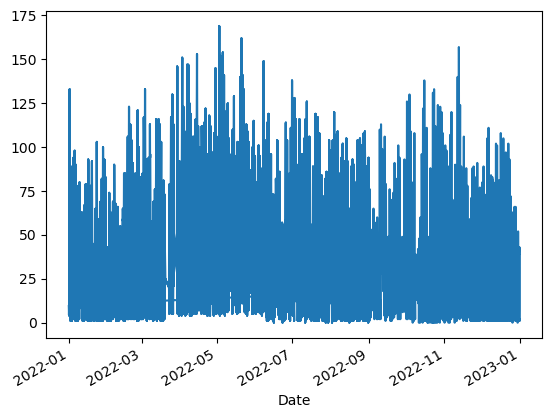

In [66]:
cca.Concentracion.plot()

<div class="alert alert-block alert-info">
<b>Nota:</b> El código anterior supo cómo graficar exactamente la serie de tiempo porque las columnas de Pandas son objetos llamados Series y las Series siempre tienen asociado el índice del DataFrame. Específicamente, este DataFrame y su columna de Concentración tienen un índice de tiempo tipo Datetime, que definimos algunas celdas arriba. 
</div>

In [67]:
cca.Concentracion

Date
2022-01-01 00:00:00     5.0
2022-01-01 01:00:00    10.0
2022-01-01 02:00:00     9.0
2022-01-01 03:00:00     6.0
2022-01-01 04:00:00     4.0
                       ... 
2022-12-31 20:00:00    22.0
2022-12-31 21:00:00    11.0
2022-12-31 22:00:00     2.0
2022-12-31 23:00:00     1.0
2023-01-01 00:00:00     2.0
Name: Concentracion, Length: 13880, dtype: float64

### **<font color="SeaGreen"> Pequeñas/grandes transformaciones de datos </font>**

Ahora que sabemos lo básico de Pandas podemos pasar a transformaciones un poco más complicadas. 

La clase pasada vimos lo que hace el método de `groupby` y `mean`.

Por ejemplo, una pregunta que nos podría surgir es. 

**¿Cuál es el promedio de ozono por estación?**

¿Qué estaciones creen que tengan la peor calidad del aire (medida por ozono)?

Para contestar esta pregunta, primero agrupamos todos los datos por estación y luego sacamos el promedio, en este caso de la concentración. 



In [68]:
# agrupamos, genera un objeto del tipo groupby, que no es muy interesante
print(df.groupby(df.Estacion))
# pero si le sacamos el operador mean
print(df.groupby(df.Estacion).mean())
df.groupby(df.Estacion).mean()['Concentracion']

             Unnamed: 0  Concentracion
Estacion                              
ACO       278964.190894      29.694734
AJM       347940.393495      42.241411
AJU       244782.244162      39.633264
ATI       281410.783819      29.816738
BJU       256997.435783      34.180751
CAM       277935.898484      27.306569
CCA       263933.481268      36.532349
CHO       265843.059416      30.374801
CUA       263542.595196      37.865881
CUT       262545.338494      27.721542
FAC       269262.562891      27.095709
FAR       264013.994670      31.626915
GAM       266538.889208      29.771279
INN       251362.368504      28.447017
IZT       257487.033168      31.103380
LLA       277995.674586      26.173906
LPR       263137.669316      26.979909
MER       105001.529456      29.490994
MGH       106177.906467      31.329923
MON       116426.683349      33.340953
MPA       108469.908852      53.095530
NEZ       102944.966036      34.266250
PED        97052.134474      36.522578
SAC       102664.796078  

Estacion
ACO    29.694734
AJM    42.241411
AJU    39.633264
ATI    29.816738
BJU    34.180751
CAM    27.306569
CCA    36.532349
CHO    30.374801
CUA    37.865881
CUT    27.721542
FAC    27.095709
FAR    31.626915
GAM    29.771279
INN    28.447017
IZT    31.103380
LLA    26.173906
LPR    26.979909
MER    29.490994
MGH    31.329923
MON    33.340953
MPA    53.095530
NEZ    34.266250
PED    36.522578
SAC    34.388453
SAG    27.386609
SFE    40.213772
TAH    36.094545
TLA    29.152961
TLI    31.135682
UAX    37.954391
UIZ    33.713476
VIF    31.505198
Name: Concentracion, dtype: float64

Ahora que tenemos una nueva base de datos, filtrada para la estación del CCA, podemos hacer algo que tendremos que hacer muchas veces, que es guardar nuestros datos en otro archivo. Para esto se utiliza el método de `to_csv` que guarda un dataframe en un archivo. 

El nombre del archivo es el argumento de la función, así que mucho ojo con donde queremos guardar los archivos. 

In [69]:
cca.to_csv('datos_cca.csv')

### Más operaciones con el tiempo

Una operación fundamental con pandas una vez que el índice es del tipo DatetimeIndex es cambiar la resolución temporal de los datos. Por ejemplo, esta base de datos tiene una resolución temporal de 1 hora pero quizás sea útil pasarlos a datos diarios. 

Para esto, se utiliza el método `resample()` y el operador `mean()`. Resample cambia la resolución o el "sampleado" de los datos. Como argumento, toma la nueva resolución donde la letra D significa días y el valor de 1 quiere decir que la nueva resolución es de 1 día. 




In [70]:
df.resample('1D').mean(numeric_only=True)

,Unnamed: 0,Concentracion
Date,,
2022-01-01,70824.220952,33.703810
2022-01-02,74442.109057,19.987985
2022-01-03,68609.247645,27.714670
2022-01-04,69801.454217,28.512048
2022-01-05,71592.361250,32.043750
...,...,...
2022-12-28,522277.856061,24.469697
2022-12-29,523231.479876,20.012384
2022-12-30,524012.761671,18.506143


¿Cómo creen que se vería la línea anterior si quisiéramos hacer un cambio en los datos pero para un promedio de 5 días?

In [71]:
df.resample('5D').mean(numeric_only=True)

,Unnamed: 0,Concentracion
Date,,
2022-01-01,71275.818202,28.170477
2022-01-06,72893.228303,26.608624
2022-01-11,75389.158233,20.438356
2022-01-16,81982.633420,26.386945
2022-01-21,90087.141130,24.825493
...,...,...
2022-12-12,510215.179909,29.675369
2022-12-17,514518.515801,28.609481
2022-12-22,518927.294953,25.160358


# <font color="ForestGreen">Manejo de datos en formato TXT</font>

Un archivo TXT es texto plano guardado línea por línea. Cada línea suele representar un registro y los campos pueden separarse por tabulaciones, espacios, comas o punto y coma. Es común en ciencias ambientales para bitácoras, salidas de instrumentos y series temporales por su portabilidad y lectura sencilla.

Puntos clave:
- Delimitador: aclara si usas tab (`\t`), espacios, coma o punto y coma.
- Encabezados y comentarios: a veces hay una fila con nombres de columnas o líneas que empiezan con `#` con metadatos.
- Codificación: preferir UTF-8 para acentos; indícala si no es la predeterminada.
- Valores faltantes: define cómo se representan (NA, -9999, vacío).

Lectura en Python:
- `pandas.read_csv` funciona para TXT si especificas el separador (`sep="\t"` para TSV, `delim_whitespace=True` para espacios) y `comment="#"` para ignorar comentarios. Para columnas de ancho fijo, `read_fwf`.

# <font color="ForestGreen">Introducción rápida al ONI (Oceanic Niño Index)</font>

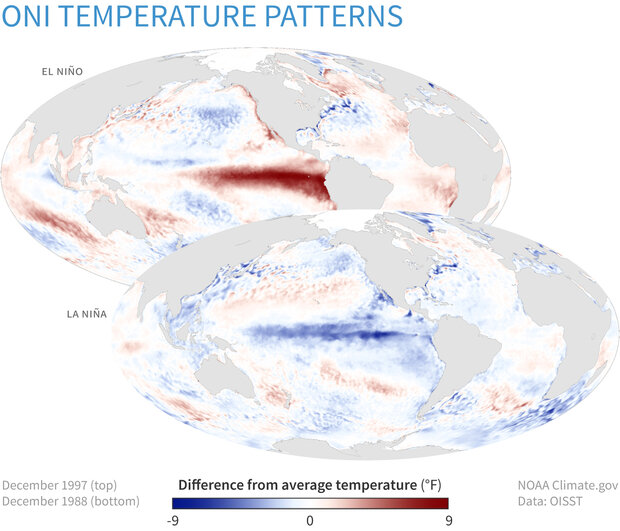

El **ONI** es un índice que resume el estado de **ENSO** (El Niño–La Niña) a partir de las **anomalías de temperatura superficial del mar** en la región **Niño 3.4** (5°N–5°S, 170°W–120°W). Se calcula como un **promedio móvil de 3 meses** (DJF, JFM, FMA, …) usando una climatología de ~30 años y datos de TSM reconstruidos (ERSST). Se actualiza mensualmente.

**¿Para qué sirve?**  
Es la referencia operativa más común para clasificar episodios:
- **El Niño**: ONI ≥ +0.5 °C durante **5** temporadas trimestres superpuestas.
- **La Niña**: ONI ≤ −0.5 °C durante **5** temporadas.
- **Neutral**: valores entre esos umbrales.

**Formato típico (TXT/ASCII)**  
Tabla por **año** con 12 columnas de temporadas solapadas (DJF, JFM, …, NDJ) y valores en °C con signo. Es texto plano, fácil de leer con `pandas.read_csv(..., delim_whitespace=True)` y útil para ejercicios de:
- filtrado por año/temporada,
- conteo de meses/temporadas El Niño vs. La Niña,
- gráficos de líneas o barras por temporada.

**Notas prácticas**  
- Las temporadas están **solapadas** (no tratarlas como meses independientes).  
- La climatología se **actualiza** cada cierto tiempo; si comparas con otras fuentes, verifica el periodo base.


In [72]:
oni=pd.read_csv('oni.ascii.txt')

In [73]:
# necesitamos decir cómo se delimitan las columnas
oni=pd.read_csv('oni.ascii.txt',delim_whitespace=True)

/tmp/ipykernel_21853/2549875294.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  oni=pd.read_csv('oni.ascii.txt',delim_whitespace=True)


In [74]:
oni

,SEAS,YR,TOTAL,ANOM
0,DJF,1950,24.72,-1.53
1,JFM,1950,25.17,-1.34
2,FMA,1950,25.75,-1.16
3,MAM,1950,26.12,-1.18
4,AMJ,1950,26.32,-1.07
...,...,...,...,...
902,FMA,2025,27.11,-0.18
903,MAM,2025,27.60,-0.09
904,AMJ,2025,27.72,-0.11
905,MJJ,2025,27.54,-0.11


Text(0, 0.5, 'Indice')

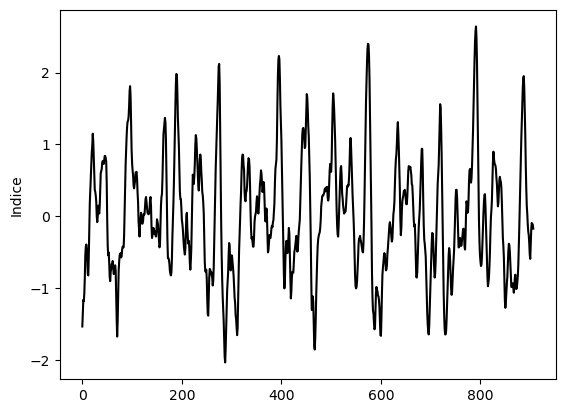

In [75]:
plt.plot(oni.ANOM,c='k')
plt.ylabel('Indice')

In [76]:
# La tabla ONI típica: columnas por temporada de 3 meses (DJF, JFM, ..., NDJ)
seasons = ["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"]
month_of = {"DJF":1, "JFM":2, "FMA":3, "MAM":4, "AMJ":5, "MJJ":6,
            "JJA":7, "JAS":8, "ASO":9, "SON":10, "OND":11, "NDJ":12}

In [77]:
x_dates = []
y_vals  = []
x_scatter = []
y_scatter = []

for r in range(len(oni)):
    year = int(oni.YR.iloc[r])
    temporada=oni.SEAS.iloc[r]
    #print(temporada)
    month=month_of[temporada]
    x = pd.Timestamp(year=year, month=month, day=15)
    #print(x)
    x_dates.append(x)
    if oni.ANOM.iloc[r] >= 0.5:
            x_scatter.append(x)
            y_scatter.append(float(oni.ANOM.iloc[r]))
oni['fecha']=x_dates

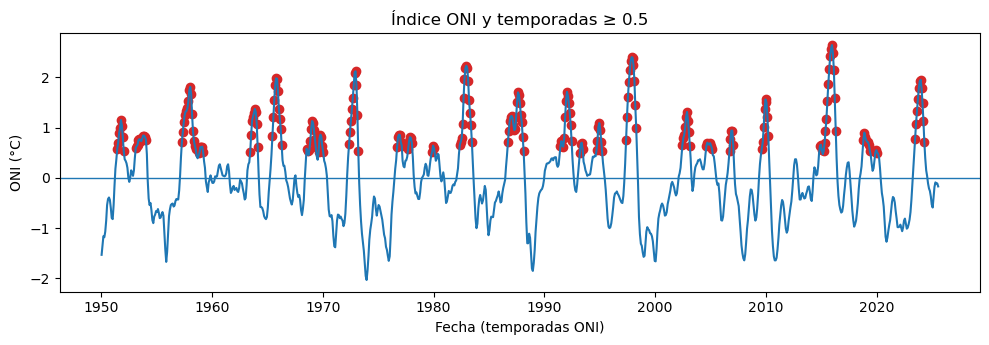

In [78]:
plt.figure(figsize=(10,3.55))
plt.plot(oni.fecha,oni.ANOM)
plt.scatter(x_scatter,y_scatter,c='tab:red')
plt.axhline(0, linewidth=1)
plt.xlabel("Fecha (temporadas ONI)")
plt.ylabel("ONI (°C)")
plt.title("Índice ONI y temporadas ≥ 0.5")
plt.tight_layout()

In [79]:
nino=oni[oni.ANOM>0.5]
nino.to_csv('datos_nino.csv')

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

<font color="DarkRed"> Vamos a hacer un análisis muy específico con los datos que tenemos. Específicamente, vamos a utilizar todos nuestros datos filtrados para:
    
<font color="DarkRed"> 1. Obtener el promedio por mes de las concentraciones de ozono en todas las estaciones. 
    
<font color="DarkRed"> 2. Graficar los resultados y mostrar el ciclo estacional del ozono.
    
</font>

---
    
Para empezar el análisis, tenemos que pensar en qué queremos hacer. 
    
Metodología:
    
1. Promedios por mes. Algo con groupby y una operación de .mean(). Guardar los resultados una variable.
    
2. Graficar los resultados 

3. mostrar en las etiquetas quiénes son los meses. 

In [80]:
mensual=df.groupby(df.index.month).mean(numeric_only=True)
print(mensual)

         Unnamed: 0  Concentracion
Date                              
1      80640.196649      25.713592
2     110965.118690      27.865808
3     134553.142577      32.942976
4     163315.077609      40.231412
5     189592.586114      45.424518
6     219436.234831      29.777404
7     244790.619911      30.698310
8     265259.381532      28.093767
9     432107.863015      24.124653
10    459040.174797      28.464882
11    485911.713081      27.418633
12    512041.857942      25.457383


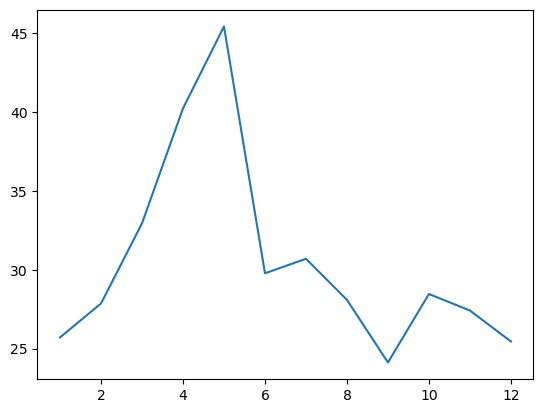

In [81]:
plt.plot(mensual['Concentracion'])

([<matplotlib.axis.XTick at 0x7de9a804d810>,
 [Text(1, 0, 'Ene'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Abr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Ago'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dic')])

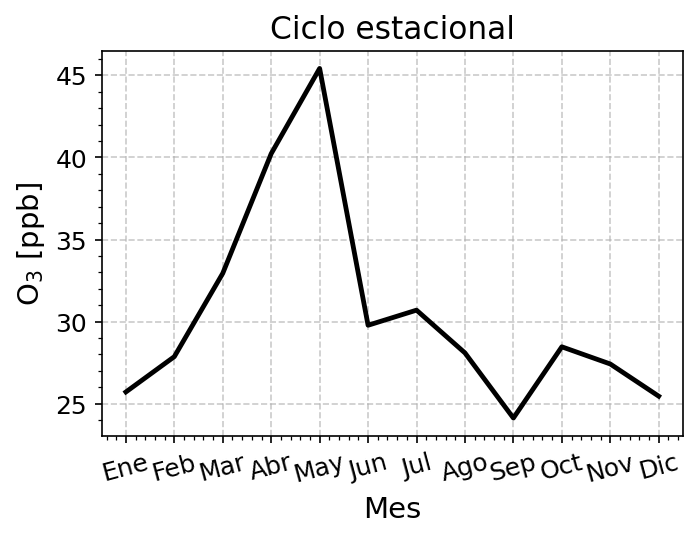

In [82]:
# grafica chida
plt.figure(figsize=(5,3.33),dpi=150)
plt.plot(mensual['Concentracion'],c='k',linewidth=2.3)
grafico_linea_ts(0.5,12.5,'Mes','O$_3$ [ppb]','Ciclo estacional')
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
plt.xticks(np.arange(1,13),meses,fontsize=12,rotation=15)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 4 - Divide y vencerás </font>**

<font color="DarkBlue"> 1. Haga una serie de tiempo que se vea bonita para la concentración de ozono en el CCA para el mes de marzo de 2023. 
    
<font color="DarkBlue"> 2. El efecto de fin de semana se refiera a que el ozono tiende a aumentar durante el fin de semana contradiciendo la creencia popular de que hay mejor calidad del aire en fin de semana. Muestra una gráfica del promedio de ozono para la base de datos utilizando las 5 estaciones seleccionadas del promedio de ozono por día de la semana. Es decir, 7 puntos, uno para el lunes, martes, miércoles, etc. Explique si ve, o no, el efecto de fin de semana. 
    
<font color="DarkBlue"> 3. Convierta los datos de las 5 estaciones a frecuencia mensual y guarde su nueva base de datos en la carpeta de 'data' que tiene en su repositorio. Encuentre e investigue cómo hacerle para guardar sus datos en directorio específico.
    
---